<a href="https://colab.research.google.com/github/AmitC04/EMPLOYMENT-BURNOUT-/blob/main/ProjectEBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSTALLING THE REQUIRED LIBRARIES**

In [2]:
import numpy as np
import pandas as  pd
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pickle
import os

# **LOADING THE DATASET IN THE CONSOLE **

In [3]:
data = pd.read_excel("employee_burnout_analysis-AI 2.xlsx")

In [12]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [4]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [5]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [6]:
data["Company Type"].unique()

array(['Service', 'Product'], dtype=object)

In [7]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [8]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [9]:
data.shape

(22750, 9)

In [10]:
data.size

204750

In [11]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [12]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [14]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [15]:
data.isnull().sum().values.sum()

4622

### **EXPLORATORY DATA ANALYSIS**

In [16]:
data.corr(numeric_only=True)['Burn Rate'][:-1]


Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

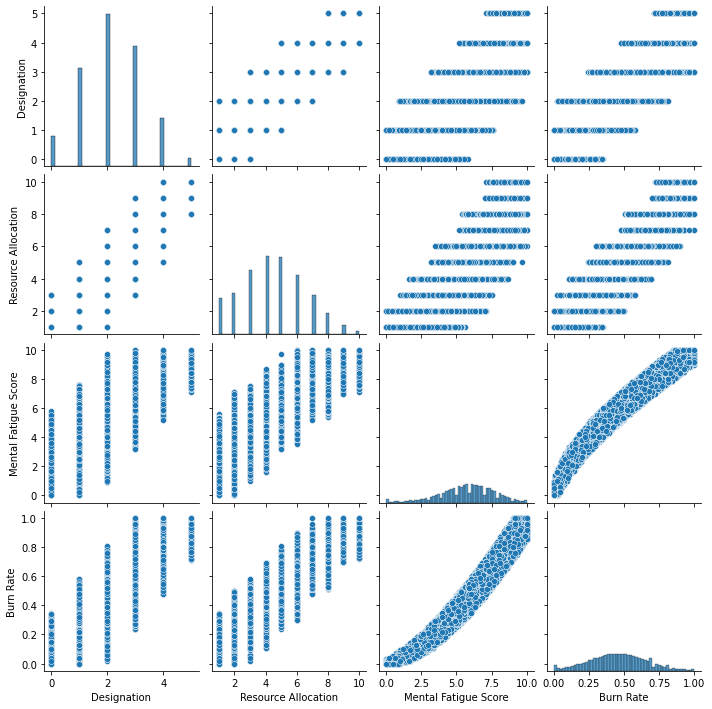

In [17]:
sns.pairplot(data)
plt.show()

In [18]:
data = data.dropna()

In [19]:
data.shape

(18590, 9)

In [20]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [21]:
data_obj = data.select_dtypes(object)
# prints a dictionary of max 10 unique values for each non-numeric column
pprint({ c : data_obj[c].unique()[:10] for c in data_obj.columns})


{'Company Type': array(['Service', 'Product'], dtype=object),
 'Employee ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH Setup Available': array(['No', 'Yes'], dtype=object)}


In [22]:
data = data.drop('Employee ID', axis = 1)


In [23]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29


Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

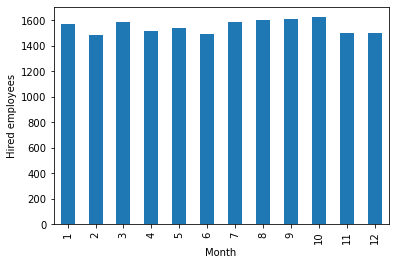

In [24]:
import matplotlib.pyplot as plt
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining']
data_month["Date of Joining"].groupby(
    data_month['Date of Joining'].dt.month
).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")


In [25]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [26]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [27]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [28]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


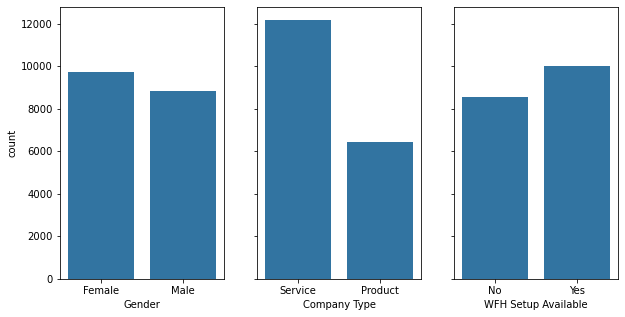

In [29]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()


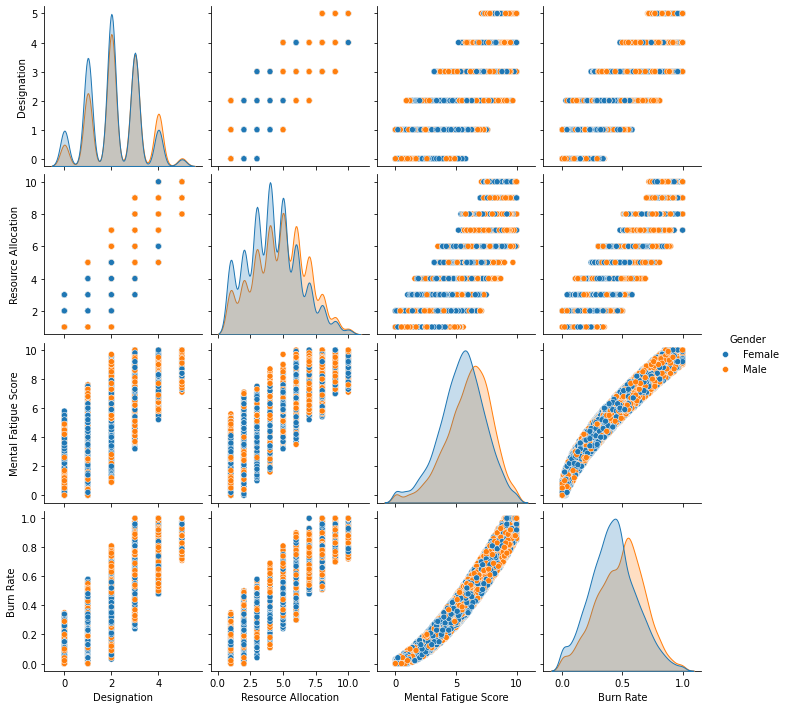

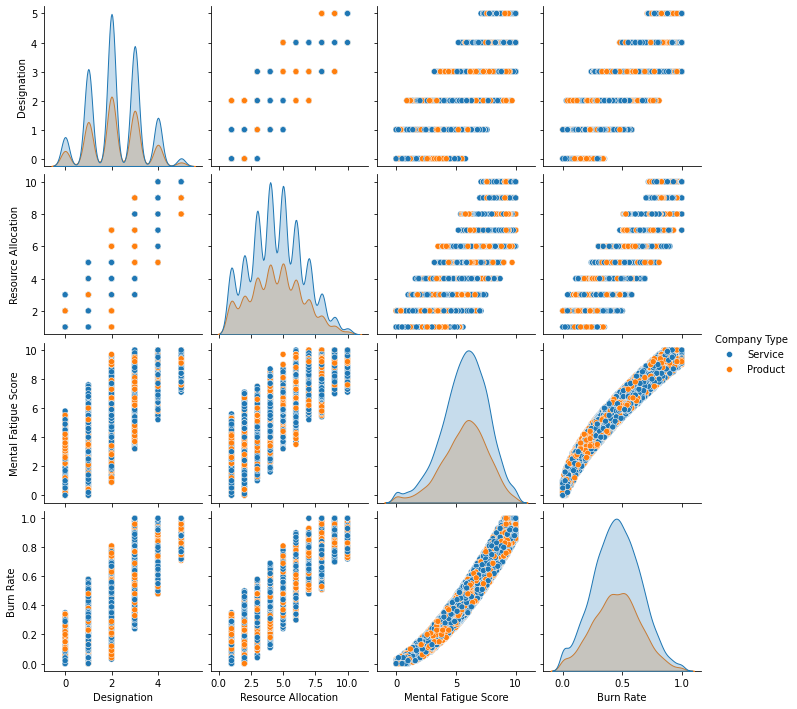

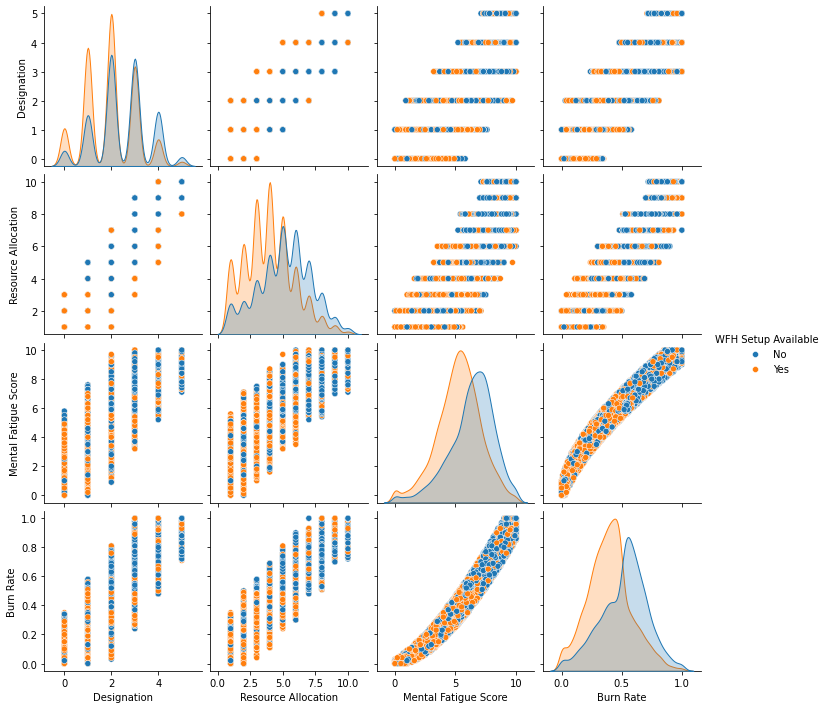

In [30]:
for c in data.select_dtypes(object).columns:
    sns.pairplot(data, hue=c)
plt.show()

In [31]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [32]:
data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available',
       'Gender'], drop_first=True)
data.head()
encoded_columns = data.columns



In [33]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)


In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [50]:
import os
import pickle

scaler_filename = '../models/scaler.pkl'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)

# Save the scaler to the file
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
import os

# Define the directory path
path = '../data/processed/'

# Create the directory if it does not exist
os.makedirs(path, exist_ok=True)

# Save the processed data
X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)


# **MODEL MAKING**

In [ ]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

In [ ]:
feature_names = X.columns.tolist()
feature_names

In [ ]:
# Save the model to a file
model_filename = '../models/linear_regression.pkl'
with open (model_filename ,'wb') as  model_file:
    pickle.dump(linear_regression_model, model_file)

In [ ]:
# Create an instance of LinearSVR and explicitly set 'dual' to 'auto' to avoid the FutureWarning
SVMLinear = LinearSVR(dual='auto', max_iter=10000)  # You can adjust 'max_iter' as needed

# Fit the model
SVMLinear.fit(X_train, y_train)


In [ ]:
#Support Vector Machine (Linear Kernel) Performance Metrics
print("Support Vector Machine (Linear Kernel) Performance Metrics\n")
# Make predictions on the test set
y_pred = SVMLinear.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


In [ ]:
SVMRbf = SVR()
SVMRbf.fit(X_train, y_train)

In [ ]:
#Support Vector Machine (RBF Kernel) Performance Metrics
print("Support Vector Machine (RBF Kernel) Performance Metrics\n")
# Make predictions on the test set
y_pred = SVMRbf.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

In [ ]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)

In [ ]:
print("R-squared Score:", r2)
